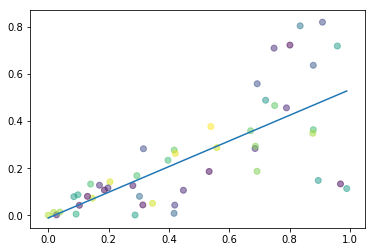

In [218]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)
n=50
x=np.random.rand(n)
y=x*np.random.rand(n)
colors=np.random.rand(n)
plt.plot(np.unique(x),np.poly1d(np.polyfit(x,y,1))(np.unique(x)))
plt.scatter(x,y,c=colors,alpha=0.5)
plt.show()

#### Aim of linear regression

build a linear regresson model with pytorch

2.1 example 

aim of it is linear regression is to minimize the distance between the points and the line y=alphax+beta

coefficient:alpha=2 

bias:beta=1

equation:y=2x+1

2.2 building a toy dataset

In [219]:
x_values=[i for i in range(11)]

In [220]:
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [221]:
#convert to numpy
x_train=np.array(x_values,dtype=np.float32)
x_train.shape

(11,)

In [222]:
#important 2d required 
x_train=x_train.reshape(-1,1) 
x_train.shape

(11, 1)

y=2x+1

In [223]:
y_values=[2*i+1 for i in x_values]

In [224]:
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [225]:
y_train=np.array(y_values,dtype=np.float32)
y_train.shape

(11,)

In [226]:
#important 2d required 
y_train=y_train.reshape(-1,1) 
y_train.shape

(11, 1)

#### building the model

In [227]:
import torch
#for linear regression model
import torch.nn as nn
from torch.autograd import Variable

1. linear model
    true equation y=2x+1
2. Foward
    input x=1
    output y=?
  

In [228]:
#create class
class LinearRegressionModel(nn.Module):
    def __init__(self,input_dim,output_dim):
        #inherit all stuffs from nn.module
        super(LinearRegressionModel,self).__init__()
                                #x    and  y
        self.linear=nn.Linear(input_dim,output_dim)
    def forward(self,x):
        # to get y value for every call
        out=self.linear(x)
        return out
    


# Instantiate model class

input: [0,1,2,....,10]
    
desired_output:[1,3,5,7,9...21]

In [229]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)


Inititate Loss class

MSE LOSS: Mean square error
         i=n   
MSE=1/n Segma (yi^-yi)
         i=1  
y^ is perdiction 
y  is true value

In [230]:
criterion=nn.MSELoss()

# instantiate Optimizer class

simplified equation:
parameter=parameter-learningrate*ParamterGradiant

In case of parameters:
parameters : alpha and beta in y=alpha x + beta
    


In [231]:
learningrate=0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learningrate)

In [232]:
epochs=100

In [233]:
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
    # Clear gradients w.r.t. parameters
    optimizer.zero_grad()
    
    # Forward to get output predicted y value
    outputs = model(inputs)
    
    # Calculate Loss
    loss = criterion(outputs, labels)
    
    # Getting gradients w.r.t. parameters
    loss.backward()
    
    # Updating parameters 
    optimizer.step()
    
    print('epoch {}, loss {}'.format(epoch, loss.data[0]))
    

epoch 1, loss 81.042724609375
epoch 2, loss 7.277432918548584
epoch 3, loss 1.2531805038452148
epoch 4, loss 0.7544361352920532
epoch 5, loss 0.7064721584320068
epoch 6, loss 0.6953576803207397
epoch 7, loss 0.6873300671577454
epoch 8, loss 0.6796333193778992
epoch 9, loss 0.6720417737960815
epoch 10, loss 0.6645374298095703
epoch 11, loss 0.6571164131164551
epoch 12, loss 0.649778425693512
epoch 13, loss 0.6425226926803589
epoch 14, loss 0.6353472471237183
epoch 15, loss 0.6282529234886169
epoch 16, loss 0.62123703956604
epoch 17, loss 0.6142999529838562
epoch 18, loss 0.6074402928352356
epoch 19, loss 0.6006571054458618
epoch 20, loss 0.5939494967460632
epoch 21, loss 0.5873169898986816
epoch 22, loss 0.580758273601532
epoch 23, loss 0.5742731690406799
epoch 24, loss 0.5678601861000061
epoch 25, loss 0.5615193843841553
epoch 26, loss 0.5552487969398499
epoch 27, loss 0.5490487217903137
epoch 28, loss 0.5429174900054932
epoch 29, loss 0.5368543267250061
epoch 30, loss 0.53085982799530

C:\Users\G2945\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


In [234]:
# Purely inference
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
predicted

array([[ 0.08513767],
       [ 2.216886  ],
       [ 4.3486347 ],
       [ 6.4803834 ],
       [ 8.612131  ],
       [10.743879  ],
       [12.875628  ],
       [15.007377  ],
       [17.139126  ],
       [19.270874  ],
       [21.402622  ]], dtype=float32)

In [235]:
# y = 2x + 1
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

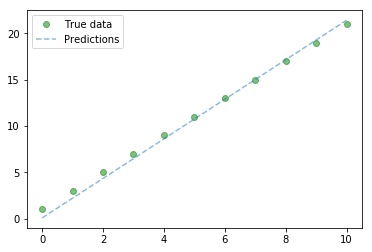

In [236]:
#clear figure
plt.clf()

#Get predictions 
predicted=model(Variable(torch.from_numpy(x_train))).data.numpy()

#plot true data 
plt.plot(x_train,y_train,'go',label='True data',alpha=0.5)

#plot predictions
plt.plot(x_train,predicted,'--',label='Predictions',alpha=0.5)
#legend and plot
plt.legend(loc='best')
plt.show()